Source Data : https://www.kaggle.com/datasets/ianalyticsgeek/flight-passangers-data

In [ ]:
# Mounting google drive ke google colabs #
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/DIBIMBING - DATA SCIENCE/Day 23 - Other Machine Learning Models With Python (Unsupervised) Part II

/content/drive/MyDrive/DIBIMBING - DATA SCIENCE/Day 23 - Other Machine Learning Models With Python (Unsupervised) Part II


# Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


# Load Dataset

In [ ]:
# Read file csv #
df = pd.read_csv('flight.csv')

In [ ]:
# first 5 rows
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


# Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

The detail of each columns as below.
* MEMBER_NO-b : Member ID

* FFP_DATE : Frequent Flyer Program Join Date

* FIRST_FLIGHT_DATE : First flight

* GENDER : Gender

* FFP_TIER : Tier of Frequent Flyer Program

* WORK_CITY : Hometown

* WORK_PROVINCE : province of origin

* WORK_COUNTRY : country of origin

* AGE : Age

* LOAD_TIME : ( observation window wnd time ) date data was taken

* FLIGHT_COUNT : Number of flights Customer

* BP_SUM : Itinerary

* SUM_YR_1 : fare revenue 1 (revenue)

* SUM_YR_2 : votes price income

* SEG_KM_SUM : total distance(km) of flights that have been carried

* LAST_FLIGHT_DATE : date of last flight

* LAST_TO_END : Time from the last boarding time to the end of the observation window

* AVG_INTERVAL : average time interval

* MAX_INTERVAL : maximum time interval

* EXCHANGE_COUNT : Number of exchanges

* avg_discount : average discount obtained

* Points_Sum : total points earned by members

* Point_NotFlight : points not used by members

#Data Preprocessing

In [ ]:
# Look if there's data null #
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [ ]:
# Lookup data duplicate #
df.duplicated().sum() 

0

In [ ]:
# Drop missing values
df = df.dropna()

In [ ]:
# Check again if there's data null #
df.isnull().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

## Statistical Summary

In [ ]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000
mean,31545.754854,4.104849,42.228736,12.067634,11066.303682,5366.827963,5694.530650,17353.000910,171.255309,67.937285,167.349206,0.328384,0.720627,12742.648820,2.820548
std,18187.496028,0.378182,9.761965,14.236472,16283.209178,8103.595049,8710.724917,20969.886756,180.560120,77.449058,122.890446,1.148485,0.183895,20606.104272,7.500252
min,3.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15787.500000,4.000000,35.000000,3.000000,2608.000000,1016.000000,846.000000,4904.000000,28.000000,23.700000,81.000000,0.000000,0.612155,2872.500000,0.000000
50%,31603.000000,4.000000,41.000000,7.000000,5832.000000,2808.000000,2846.000000,10237.000000,104.000000,44.833333,144.000000,0.000000,0.711468,6487.000000,0.000000
75%,47315.500000,4.000000,48.000000,15.000000,13022.000000,6591.500000,6958.000000,21571.500000,258.000000,82.000000,228.000000,0.000000,0.808159,14527.000000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000


In [ ]:
df = df.drop('MEMBER_NO', axis=1)

## Numeric Distribution and oulier

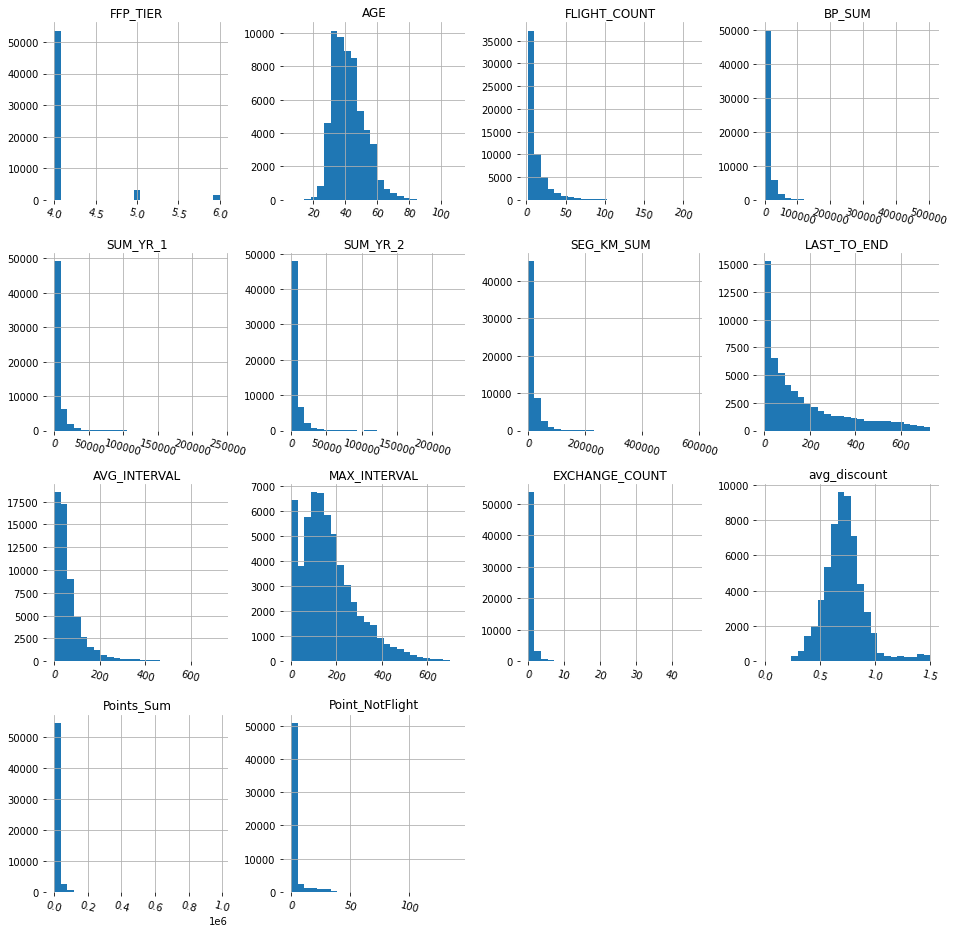

In [ ]:
h = df.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [ ]:
feat_num = ['AGE', 'SUM_YR_1','SUM_YR_2', 'SEG_KM_SUM', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum' ]
feat_num

['AGE',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum']

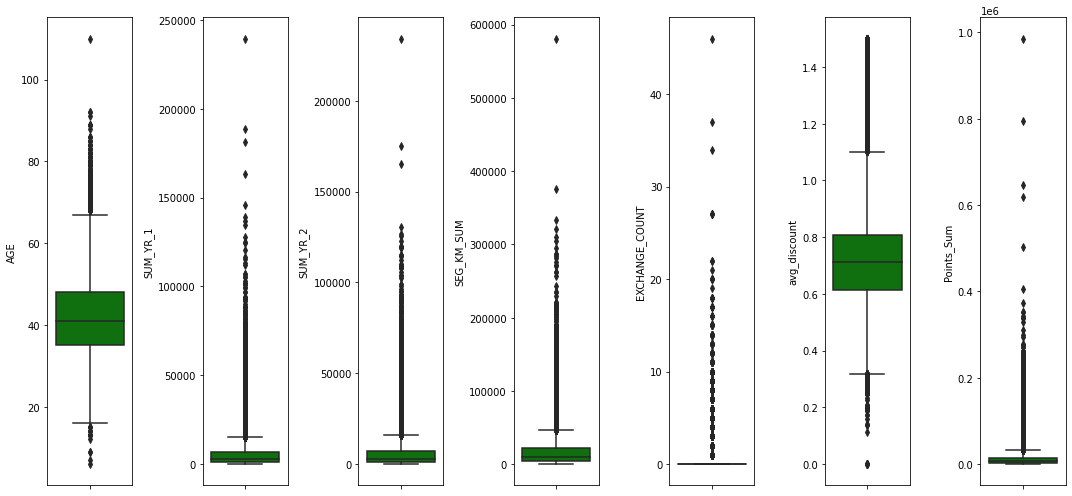

In [ ]:
plt.figure(figsize=(15, 7))
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df[feat_num[i]],color='green',orient='v')
    plt.tight_layout()
    

## Correlation Matrix

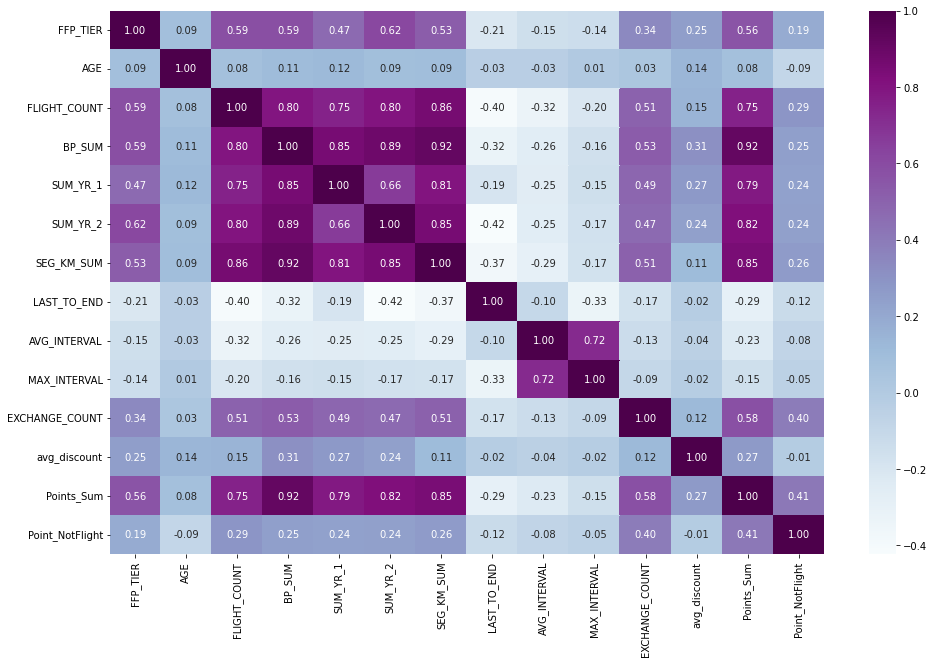

In [ ]:
corr_= df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

## Scaling

In [ ]:
# Define numerical data (exclude date ) #
numericals = df[['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']]
numericals

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,6,31.0,210,505308,239560.0,234188.0,580717,1,3.483254,18,34,0.961639,619760,50
2,6,40.0,135,351159,163618.0,164982.0,283712,11,5.298507,18,20,1.254676,406361,26
3,5,64.0,23,337314,116350.0,125500.0,281336,97,27.863636,73,11,1.090870,372204,12
4,6,48.0,152,273844,124560.0,130702.0,309928,5,4.788079,47,27,0.970658,338813,39
5,6,64.0,92,313338,112364.0,76946.0,294585,79,7.043956,52,10,0.967692,343121,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62982,4,35.0,2,0,0.0,0.0,3848,437,0.000000,0,0,0.000000,0,0
62983,4,25.0,2,0,0.0,0.0,1134,297,4.000000,4,1,0.000000,12318,22
62984,4,38.0,4,0,0.0,0.0,8016,89,37.000000,60,14,0.000000,106972,43
62985,4,43.0,2,0,0.0,0.0,2594,29,166.000000,166,0,0.000000,0,0


In [ ]:
# Scalling data exclude date data #
sc_data = StandardScaler()
data_std = sc_data.fit_transform(numericals.astype(float))

#Modelling

## K-Means

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_std)

In [ ]:
df_data_std = pd.DataFrame(data=data_std, columns=list(numericals))

In [ ]:
df_data_std['clusters'] = kmeans.labels_
df['clusters'] = kmeans.labels_

In [ ]:
df.head(3)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,...,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,clusters
0,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,...,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50,1
2,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,...,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26,1
3,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,...,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12,1


In [ ]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
df['clusters'].value_counts()

0    27544
2    16917
3    11989
1     1805
Name: clusters, dtype: int64

From the data processed, we know that the passenger flight can be divided into 4 clusters : cluster 0, cluster 1, cluster 2, and cluster 3

#Evaluation

## Inertia

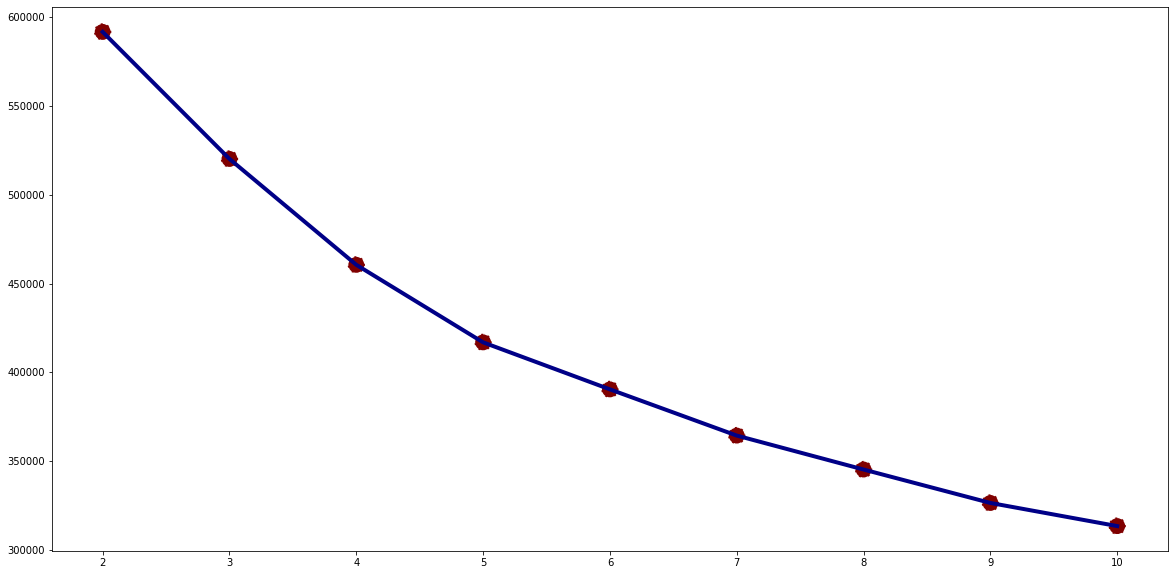

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


From the diagram, we know that the elbow is on number 4. It means clustering in passanger data will be good in 4 clusters. In accordance from the modelling before, the passenger flight can be divided into 4 clusters : cluster 0, cluster 1, cluster 2, and cluster 3

## Silhouette score

In [ ]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
arr_silhouette_score_mahalanobis = []
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(data_std)
    preds = kmeans.predict(data_std)


In [ ]:
score_euclidean = silhouette_score(data_std, preds, metric='euclidean')
arr_silhouette_score_euclidean.append(score_euclidean)

In [ ]:
score_euclidean

0.16397877654272305

Score euclidean is 0,1639, which means the distance of two object data around 0,1639 (approximately similar after scalling )

In [ ]:
score_mahalanobis = silhouette_score(data_std, preds, metric='mahalanobis')
arr_silhouette_score_mahalanobis.append(score_mahalanobis)


In [ ]:
score_mahalanobis

0.07903288325009274

Score mahalanobis is effectively a multivariate equivalent of the Euclidean distance. From the result we know that mahalanobis distance is 0,079, which means the distance of multivariate variables (which have correlation) has distance 0,079 (approximately similar to each others)

# Insight

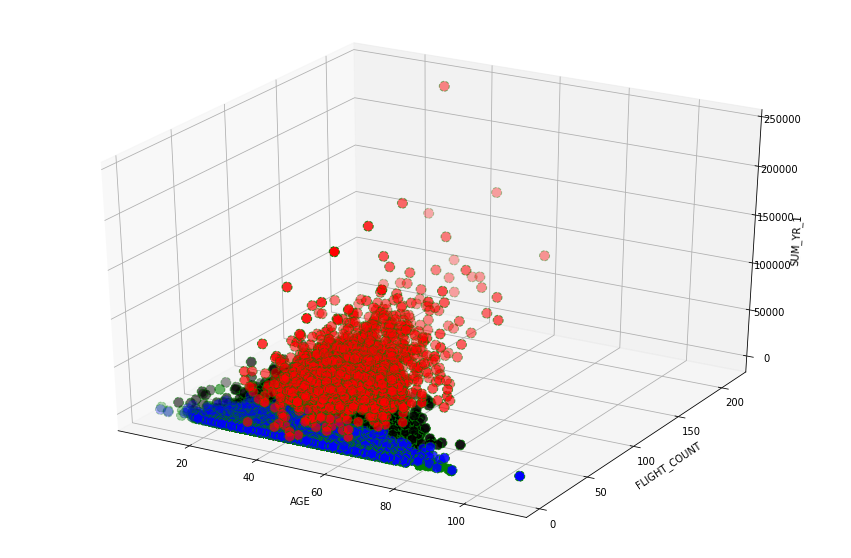

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.AGE[df.clusters == 0], df["FLIGHT_COUNT"][df.clusters == 0], df["SUM_YR_1"][df.clusters == 0], c='blue', s=100, edgecolor='green',linestyle='--')
ax.scatter(df.AGE[df.clusters == 1], df["FLIGHT_COUNT"][df.clusters == 1], df["SUM_YR_1"][df.clusters == 1], c='red', s=100, edgecolor='green',linestyle='--')
ax.scatter(df.AGE[df.clusters == 2], df["FLIGHT_COUNT"][df.clusters == 2], df["SUM_YR_1"][df.clusters == 2], c='green', s=100, edgecolor='green',linestyle='--')
ax.scatter(df.AGE[df.clusters == 3], df["FLIGHT_COUNT"][df.clusters == 3], df["SUM_YR_1"][df.clusters == 3], c='black', s=100, edgecolor='green',linestyle='--')


plt.xlabel("AGE")
plt.ylabel("FLIGHT_COUNT")
ax.set_zlabel('SUM_YR_1')
plt.show()

From the diagram, we know that varied data distribution which difficult to interpret. Therefore, we will use PCA for interpreting with 2 variables

## PCA

In [ ]:
pca = PCA(n_components=2)

pca.fit(data_std)
pcs = pca.transform(data_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] =df['clusters']
data_pca.head()

,PC 1,PC 2,clusters
0,66.316905,4.371366,1.0
1,42.532113,2.475125,NaN
2,32.111346,2.070474,1.0
3,38.993803,2.512189,1.0
4,31.361874,1.506301,1.0


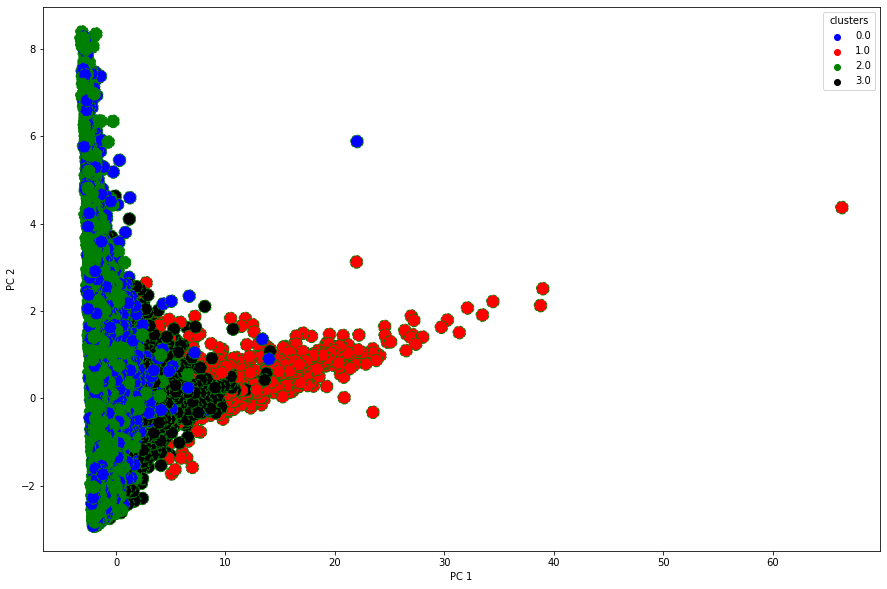

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=data_pca,
    palette=['blue','red','green','black'],
    s=160,
    ax=ax
)

From the diagram, we know that the data distributon on PC1 less than 0 has data distribution on PC2 from less than -2 until more than 8 that dominated with clusters 0 and clusters 2. And, cluster 1 and cluster 3 started appear after PC1 more than 0.

In [ ]:
display(df.groupby('clusters').agg(['mean','median']))

FFP_TIER               AGE        FLIGHT_COUNT               BP_SUM  \
              mean median       mean median         mean median          mean   
clusters                                                                        
0         4.014704    4.0  41.953275   41.0     7.548359    7.0   5967.440350   
1         5.323546    5.0  45.053186   45.0    62.475900   60.0  74578.172299   
2         4.010226    4.0  41.141928   40.0     4.445942    3.0   3751.307501   
3         4.261990    4.0  43.969889   43.0    25.615731   23.0  23540.401535   

                       SUM_YR_1           ... MAX_INTERVAL         \
           median          mean   median  ...         mean median   
clusters                                  ...                       
0          5151.0   2723.972735   2031.0  ...   252.067347  228.0   
1         63112.0  33307.124654  28768.0  ...    74.702493   65.0   
2          2671.0   2710.702193   1918.0  ...    67.337944   56.0   
3         21153.0  10979.994078   9892.0  ...   127.783051  117.0   

         EXCHANGE_COUNT        avg_discount              Points_Sum           \
                   mean median         mean    median          mean   median   
clusters                                                                       
0              0.093995    0.0     0.697294  0.693029   6728.678333   5684.5   
1              3.433795    3.0     0.892024  0.803223  91898.846537  75671.0   
2              0.050423    0.0     0.703218  0.700000   4313.554117   2944.0   
3              0.791559    0.0     0.772990  0.741310  26535.864376  23233.0   

         Point_NotFlight         
                    mean median  
clusters                         
0               1.922016    0.0  
1              14.306371    8.0  
2               1.605959    0.0  
3               4.869464    1.0  

[4 rows x 28 columns]

From the grouping above, we know that cluster are clasified by the combination od:
* Flight count
* SUM_YR_1 (revenue)
* Point_sum

The clustering identifies the loyal customer and always travelling using flight, therfore company can offer more benefit to them. We can separate the cluster as below.
* cluster 0 : the newbie customer
* cluster 1 : the newbie customer that try to use flight for travelling but not often
* cluster 2 : the loyal customer but not often in travelling
* cluster 3 : the loyal customer that often travelling





**Why not using discount as variables in considering clustering ?**

Its just because discount just the tools (in the longrun time) to boost the customer to buy flight/ using airlines but it will just get the customer who just try to find the cheapest flight but hardly to identify the loyalty of the customers. Discount just good for using in the short time only or on the preliminary of the apps/ airlines.





Based on the current apps that using 4 clusters in customer is **TIKET.COM**. There are :
* Basic blue (cluster 0)
* Elite Silver (cluster 1)
* Elite Gold (Cluster 2)
* Elite Platinum (Cluster 3)

The clustering of customers based on how often the customers using flight apps/ airline in travelling. The more often using flight, therefor the more can get the benefit from the loyalty program on tiket.com.